# Classification Models Project

### Useful function

In [2]:
import os
import numpy as np
import pandas as pd
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(data, name):
    le = preprocessing.LabelEncoder()
    data[name] = le.fit_transform(data[name])
    return le.classes_

In [3]:
import os
import numpy as np
import pandas as pd

path = "./"

filename_read = os.path.join(path,"Churn_Modelling.csv")
churn_Data = pd.read_csv(filename_read, na_values=['NA','?'])
churn_Data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
churn_Data = churn_Data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
encode_text_index(churn_Data, 'Geography')
encode_text_index(churn_Data, 'Gender')
churn_Data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [5]:
churn_Data.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
churn_Data['Gender'] = churn_Data['Gender'].astype('int64')
churn_Data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



feature_cols = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

x = churn_Data[feature_cols]
y = churn_Data.Exited

In [8]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Building Decision Tree

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

### Evaluating Model accuracy

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8566666666666667


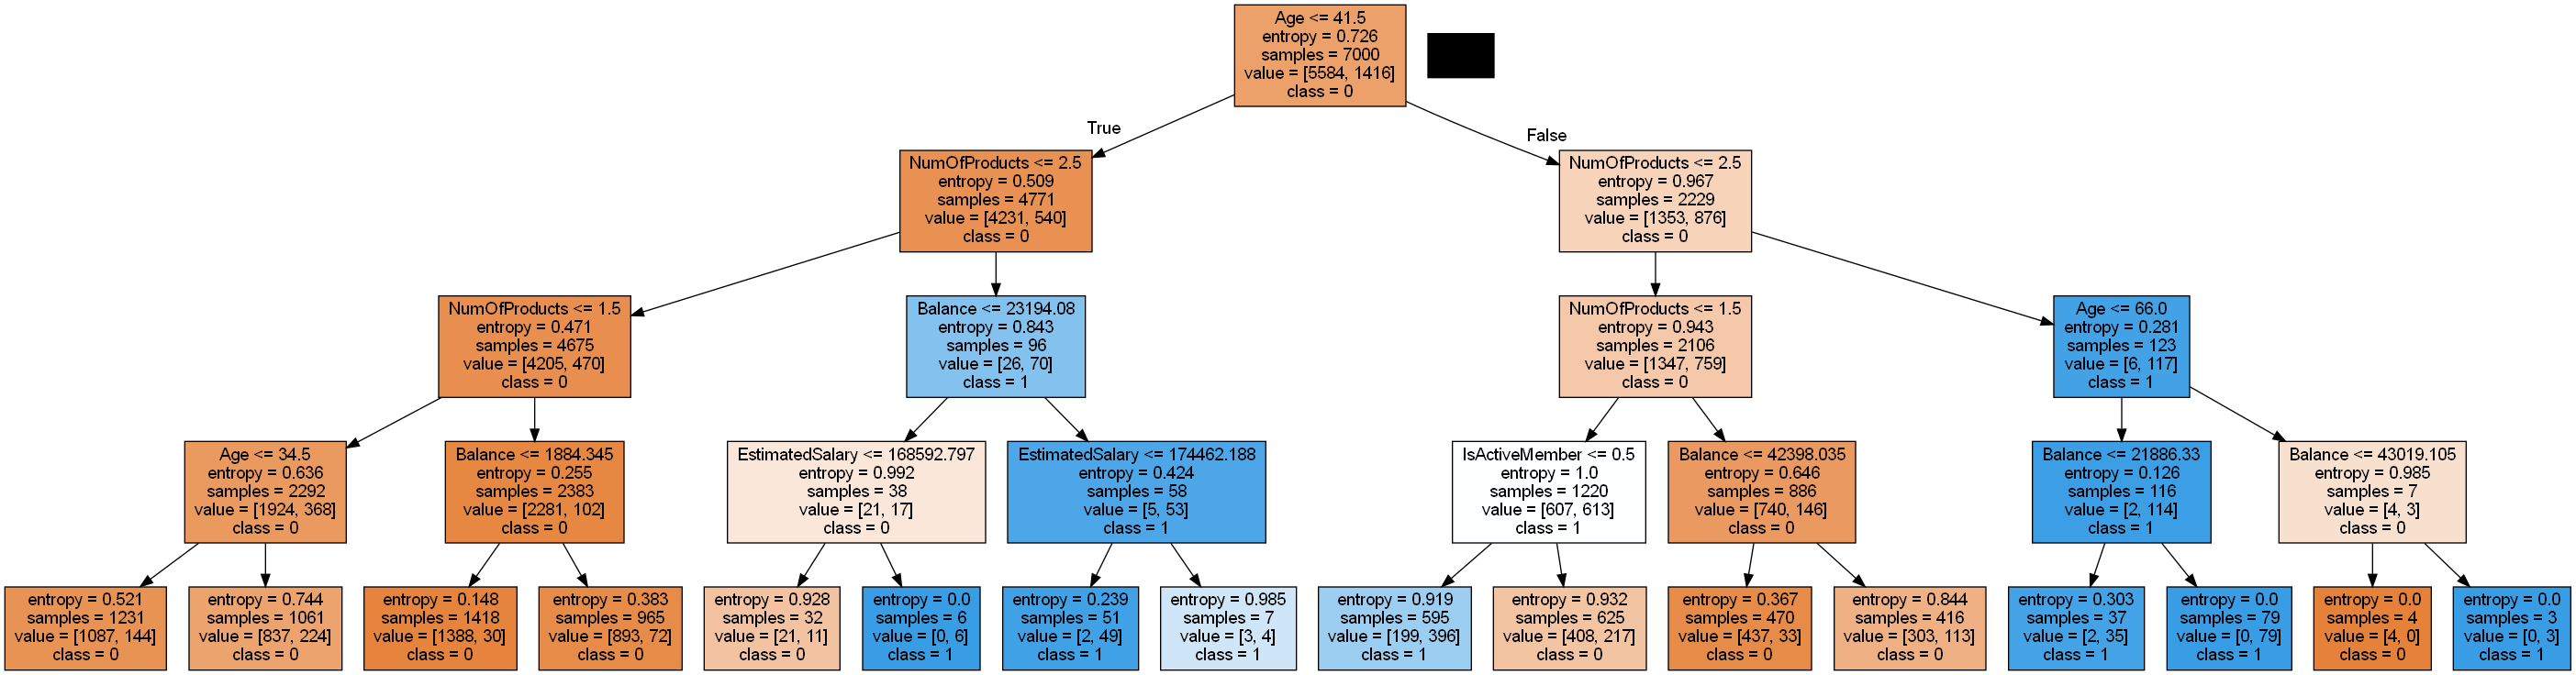

In [11]:
import pydotplus 
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, feature_names=x.columns, class_names=['0','1'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

### Removing features that doesn't provide much gain or has high entropy

In [12]:
feature_cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts']

x = churn_Data[feature_cols]
y = churn_Data.Exited

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8263333333333334


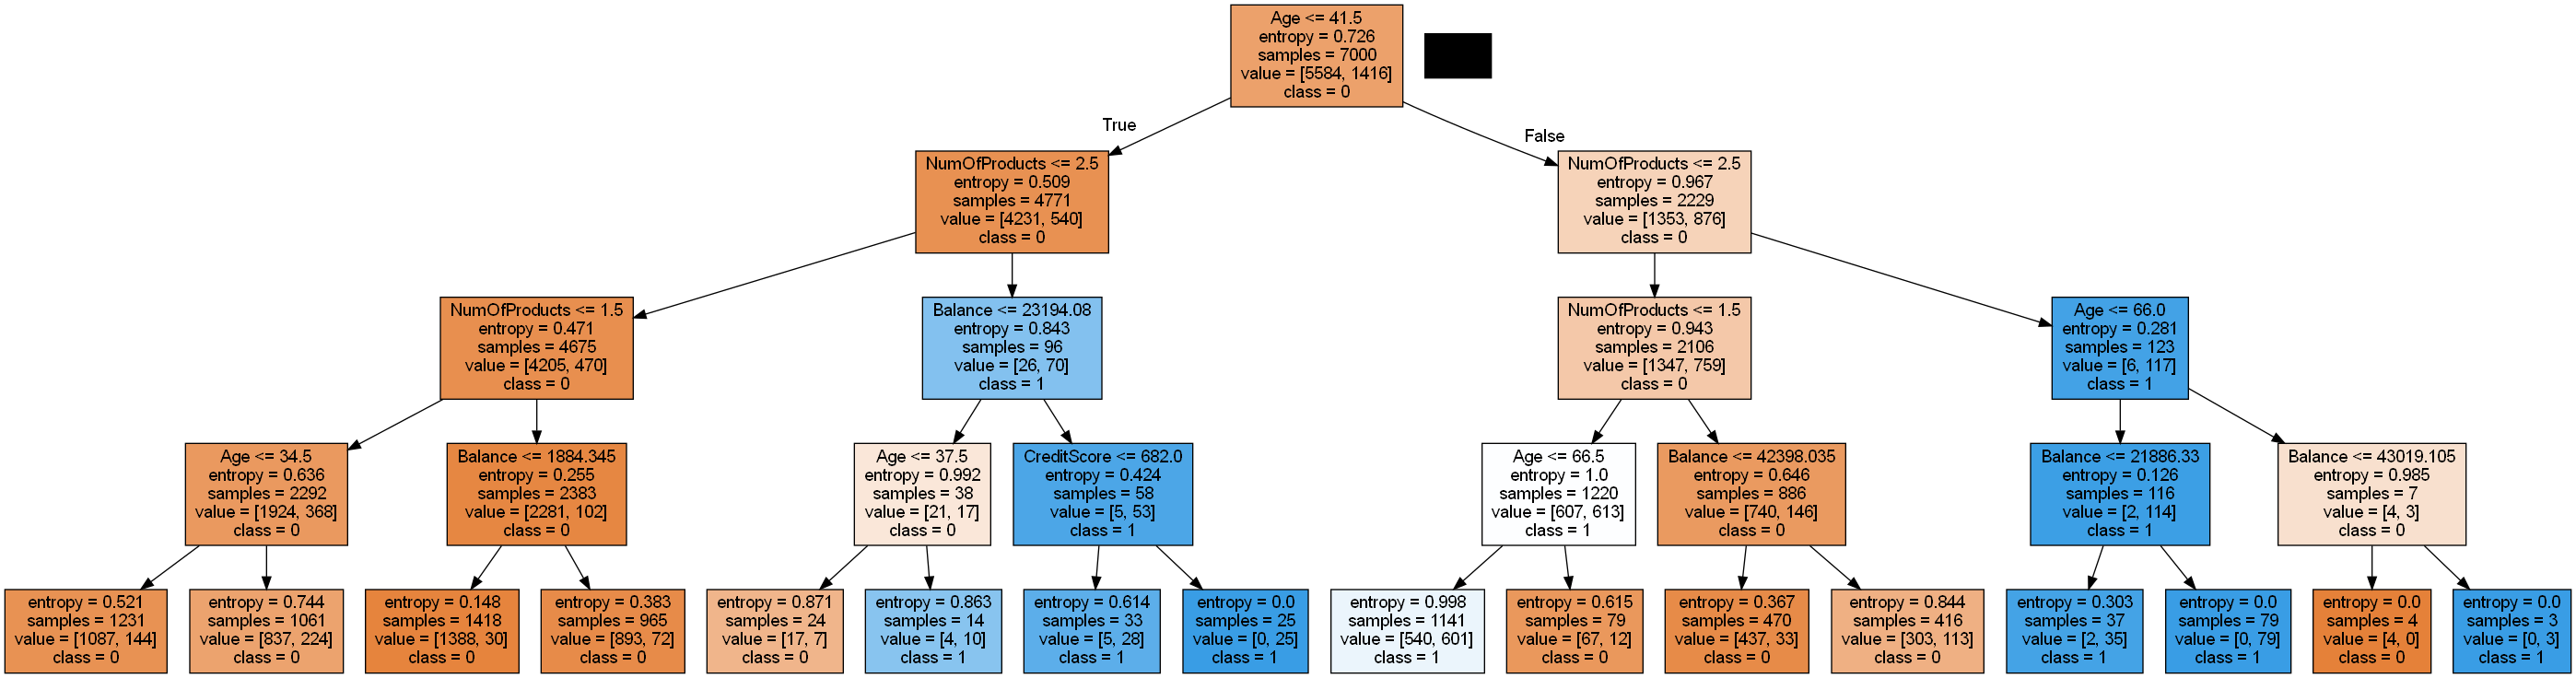

In [14]:
import pydotplus 
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, feature_names=x.columns, class_names=['0','1'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Logistic Regression (Logit)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Accuracy :  0.7843333333333333


Text(0, 0.5, 'Accuracy')

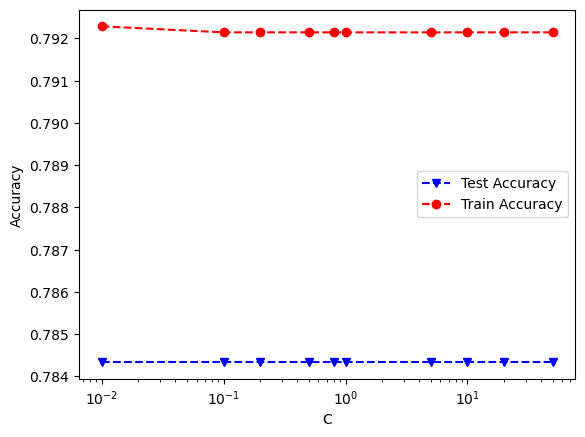

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(x_train,y_train)
    log_reg_pred = clf.predict(x_test)
    log_reg_pred_train = clf.predict(x_train)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y_train,log_reg_pred_train))
    
print ("Accuracy : ",  accuracy_score(y_test, log_reg_pred))

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

## Naive Bayes
SVC = Linear Approach <br />
SVM = Non Linear Approach

In [16]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(x,y)
NB_pred = clf_NB.predict(x_test)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))

[0 0 0 ... 0 1 0]
Accuracy on test data is 0.78


## Support Vector Machine (SVM) Classifer
C = the penalty imposed on incorrect placed data points  <br />
C = 2 meaning there is a penalty of 2 units for every wrongly identified points

In [17]:
from sklearn import svm

svmClassifier = svm.SVC(kernel='linear', gamma='auto', C=2)
svmClassifier.fit(x_train, y_train)

y_svmPred = svmClassifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_svmPred)))
print(classification_report(y_test, y_svmPred))

Accuracy on test data is 0.78
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2379
           1       0.36      0.10      0.15       621

    accuracy                           0.78      3000
   macro avg       0.58      0.53      0.51      3000
weighted avg       0.71      0.78      0.72      3000



## K-Nearest Neighbors